In [2]:
import pandas as pd
import numpy as np

In [30]:
path="C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/2)Multi Linear Regression/Assignment Given/Computer_Data.csv"

In [31]:
df=pd.read_csv(path, index_col=0)

In [32]:
df.head(5)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1


In [33]:
df.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6259 entries, 1 to 6259
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 537.9+ KB


In [35]:
df.cd.value_counts()

no     3351
yes    2908
Name: cd, dtype: int64

In [36]:
df.multi.value_counts()

no     5386
yes     873
Name: multi, dtype: int64

In [37]:
df.premium.value_counts()

yes    5647
no      612
Name: premium, dtype: int64

# Initial observation
1)No missing values
2)3 Columns have categorical variable so need to convert them to Dummy variable.
3)Columns multi & pemium has class imbalance problems

In [ ]:
df=df.replace({'yes':1, 'no':0 })

In [41]:
df

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,0,0,1,94,1
2,1795,33,85,2,14,0,0,1,94,1
3,1595,25,170,4,15,0,0,1,94,1
4,1849,25,170,8,14,0,0,0,94,1
5,3295,33,340,16,14,0,0,1,94,1
...,...,...,...,...,...,...,...,...,...,...
6255,1690,100,528,8,15,0,0,1,39,35
6256,2223,66,850,16,15,1,1,1,39,35
6257,2654,100,1200,24,15,1,0,1,39,35
6258,2195,100,850,16,15,1,0,1,39,35


In [44]:
df.trend.value_counts(ascending=False)

17    339
16    307
8     298
14    292
10    283
12    275
18    273
15    267
11    259
7     249
20    248
9     246
19    225
13    216
21    205
23    191
24    182
6     176
27    163
22    162
25    158
26    152
5     139
28    132
29    129
4     108
3     100
2      95
1      94
30     75
31     52
32     51
33     40
34     39
35     39
Name: trend, dtype: int64

# Define Target & Independent Variable

In [46]:
y=df["price"]

In [49]:
X=df.drop("price", axis=1)

In [21]:
# As we have less number of data. We will not split the data into Train & Test Dataset

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019291B29F88>,
      dtype=object)

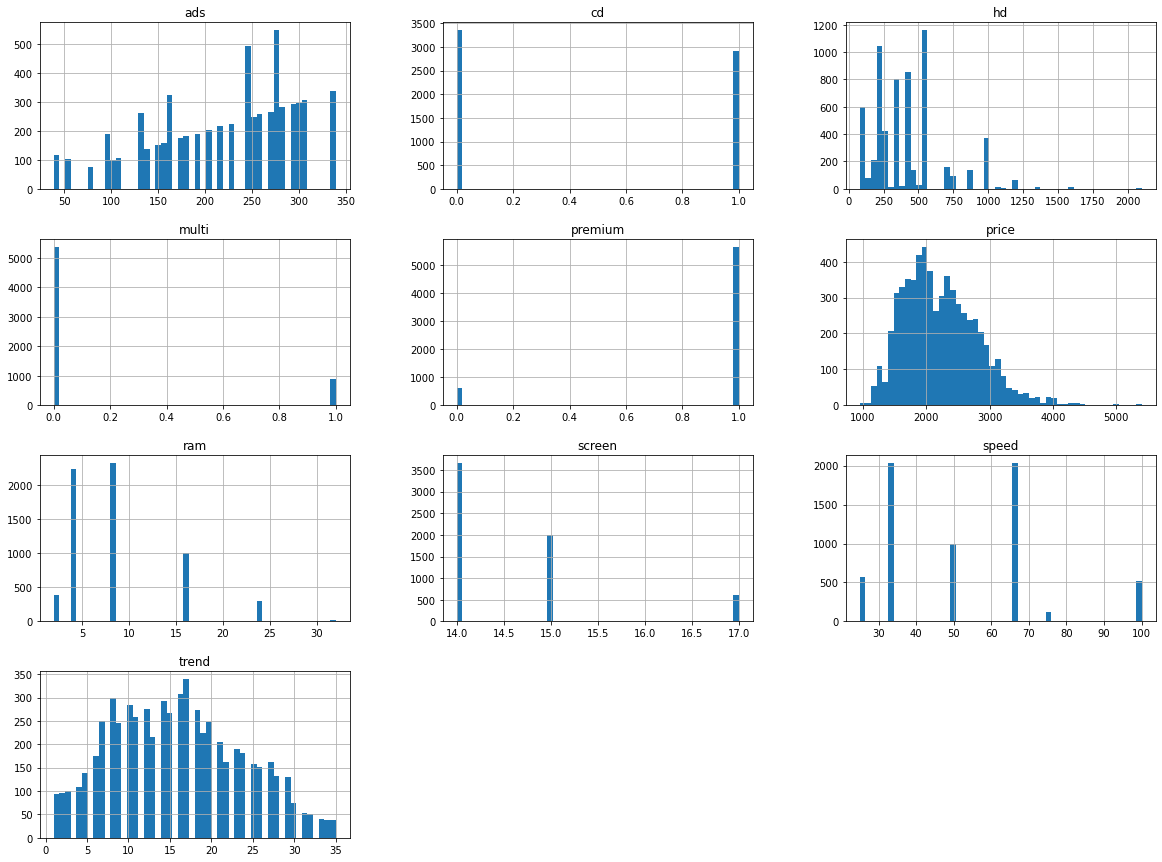

In [50]:
df.hist(bins=50, figsize=(20,15))

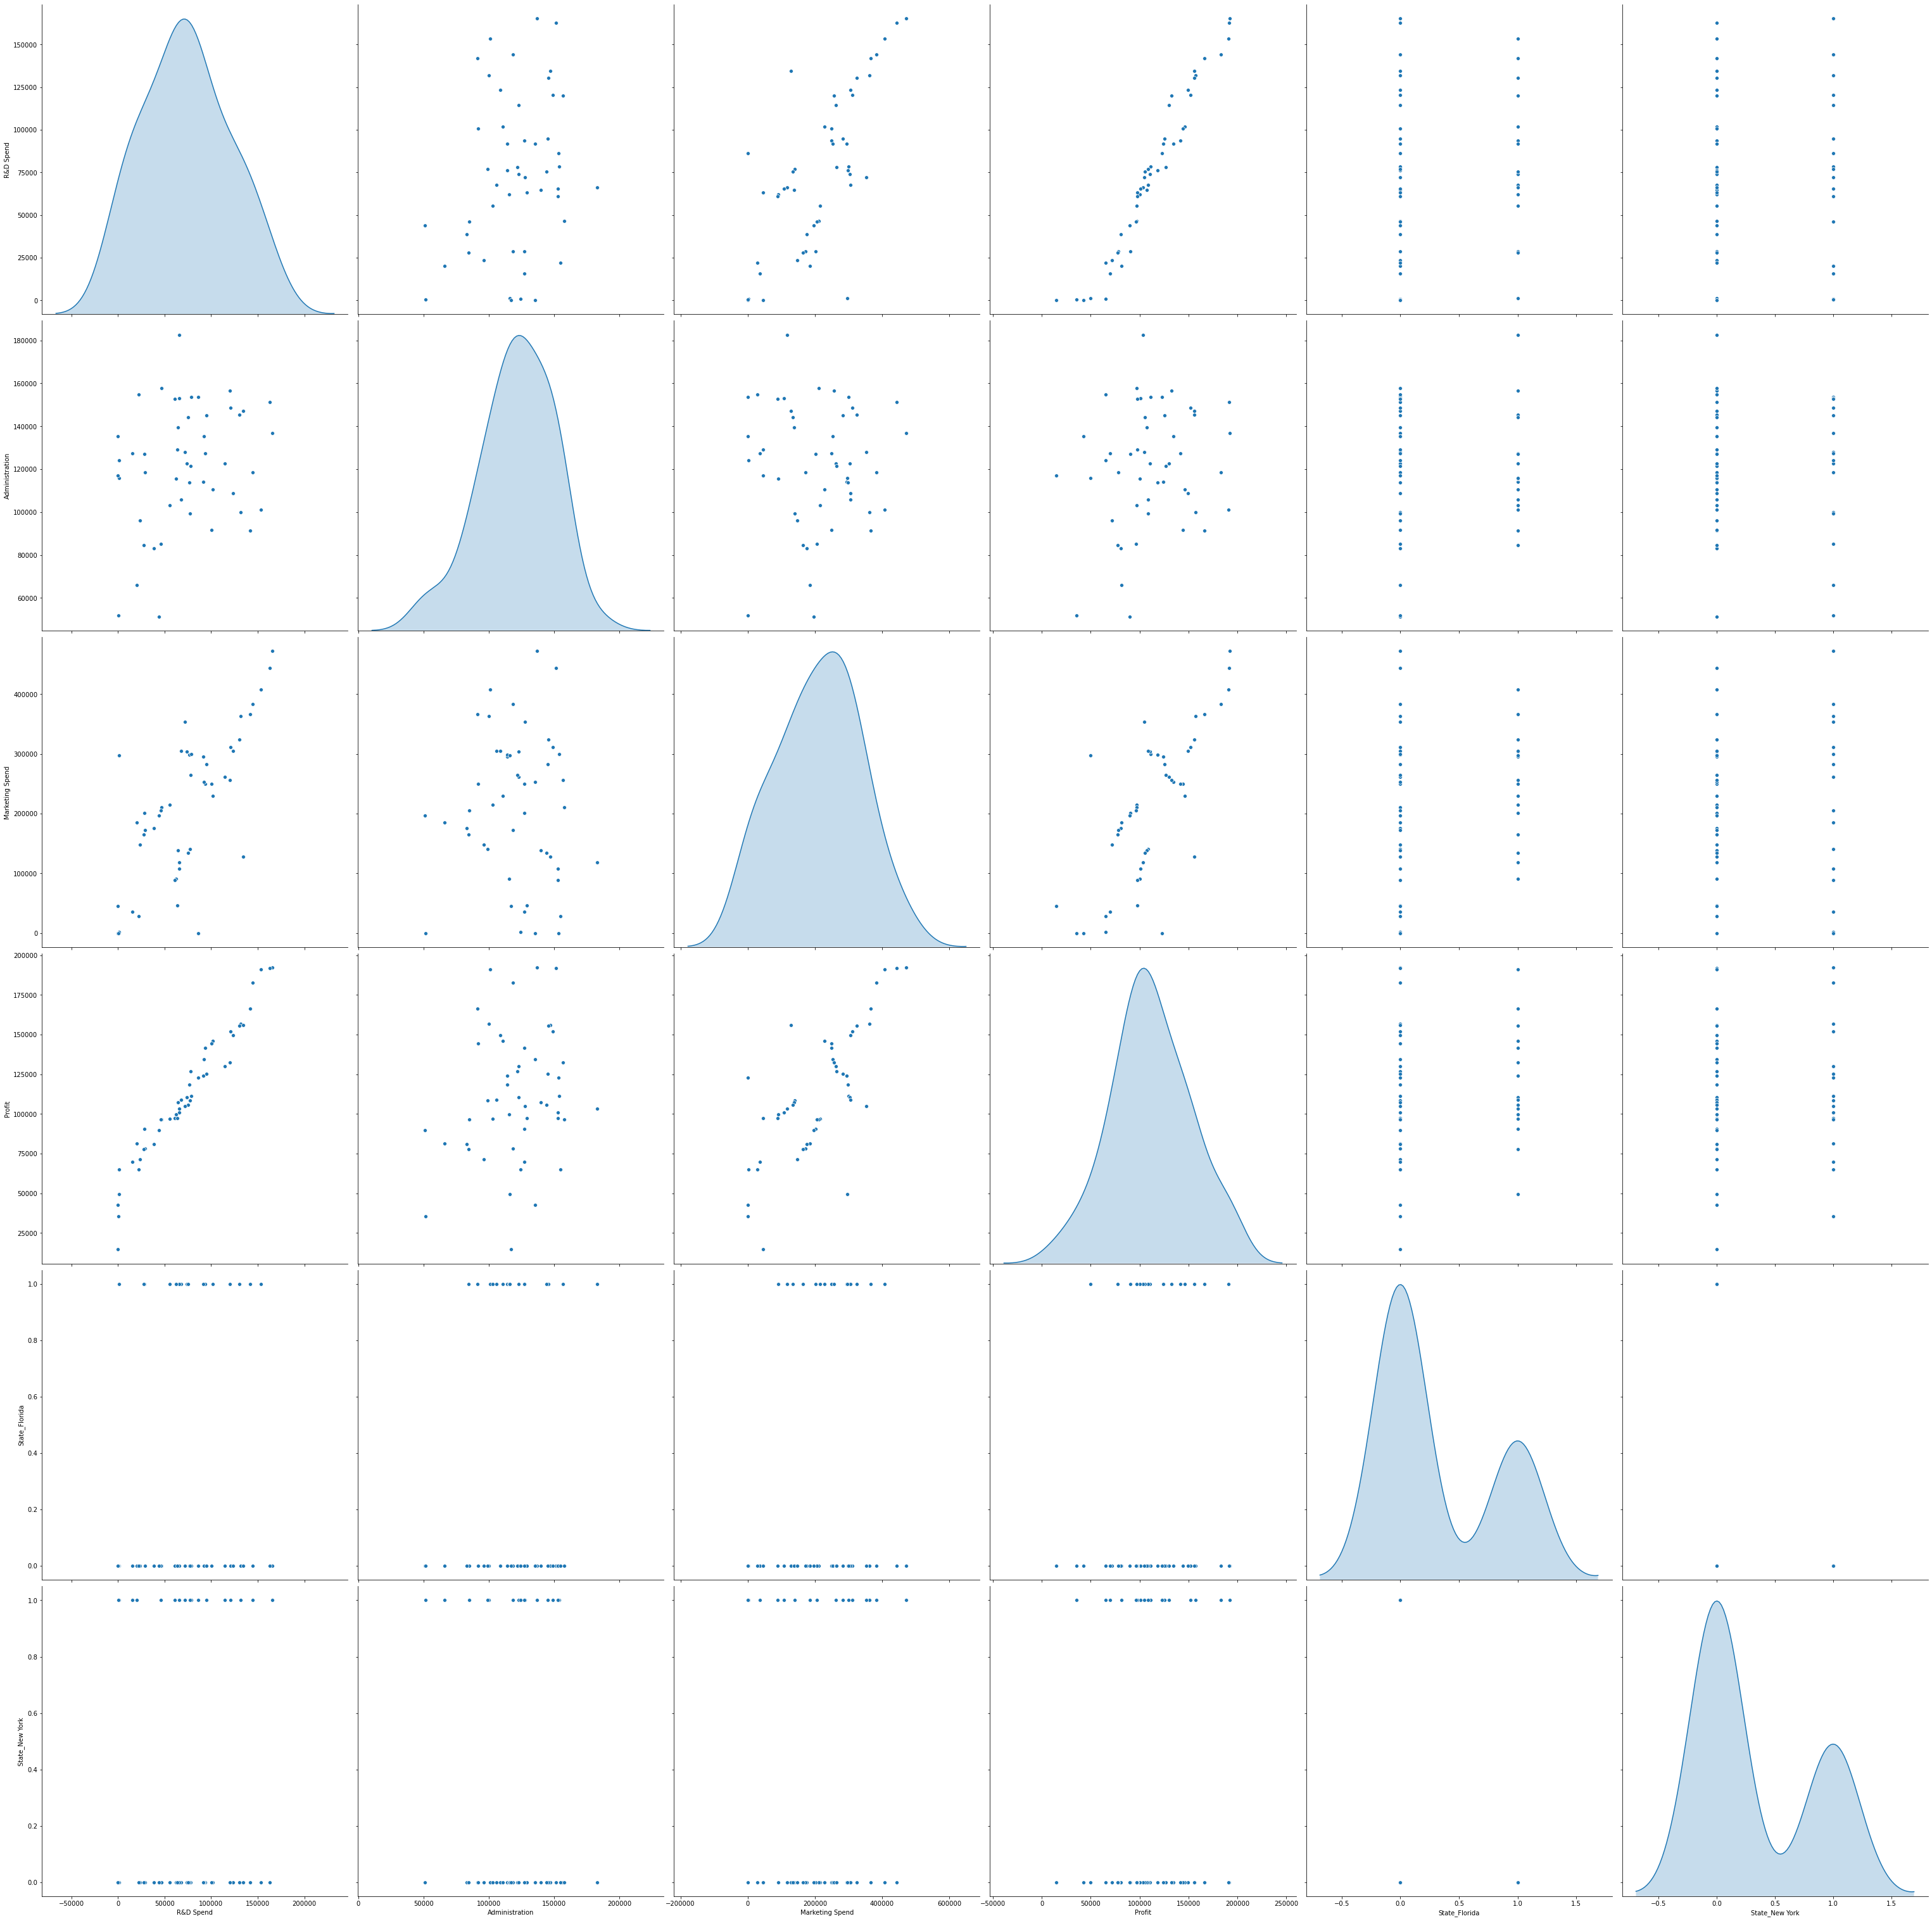

In [24]:
sns.pairplot(df, height= 7, aspect= 1, diag_kind='kde')

In [73]:
df.corr()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.197343,-0.016651,-0.080696,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,0.258260,0.084172,0.114208,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,0.503570,0.092805,0.196924,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,0.438504,0.045497,0.197145,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,0.129488,-0.001740,0.018745,-0.093919,0.188614
cd,0.197343,0.258260,0.503570,0.438504,0.129488,1.000000,0.432179,0.216077,-0.061091,0.445780
multi,-0.016651,0.084172,0.092805,0.045497,-0.001740,0.432179,1.000000,0.124775,-0.030394,0.210907
premium,-0.080696,0.114208,0.196924,0.197145,0.018745,0.216077,0.124775,1.000000,-0.152023,0.042107
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,-0.061091,-0.030394,-0.152023,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,0.445780,0.210907,0.042107,-0.318553,1.000000


In [74]:
df.std()

price      580.803956
speed       21.157735
hd         258.548445
ram          5.631099
screen       0.905115
cd           0.498786
multi        0.346474
premium      0.297040
ads         74.835284
trend        7.873984
dtype: float64

In [ ]:
# Lets use Statsmodel as well as Sklearn package to determine the Regression values

### Statsmodels

In [53]:
import statsmodels.api as sm


In [54]:
constant_X=sm.add_constant(X)

In [55]:
lm_sm=sm.OLS(y,constant_X).fit()

In [56]:
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:48:50   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        307.9880     60.353      5.103      0.000     189.675     426.301
speed          9.3203      0.185     50.364      0.000       8.958       9.683
hd             0.7818      0.028     28.311      0.000       0.728       0.836
ram           48.2560      1.066     45.265      0.000      46.166      50.346
screen       123.0890      3.999     30.776      0.000     115.249     130.929
cd            60.9167      9.516      6.402      0.000      42.263      79.571
multi        104.3238     11.413      9.141      0.000      81.951     126.697
premium     -509.2247     12.342    -41.259      0.000    -533.420    -485.030
ads            0.6573      0.051     12.809      0.000       0.557       0.758
trend        -51.8496      0.629    -82.470      0.000     -53.082     -50.617
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                     9.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Sklearn

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
mlr_sk=LinearRegression(normalize=True)

In [60]:
mlr_sk.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [61]:
print(mlr_sk.intercept_, mlr_sk.coef_)

307.98798482149823 [   9.32028083    0.78177979   48.2559591   123.08904227   60.91670833
  104.32381921 -509.22473189    0.65729133  -51.84958117]


In [62]:
pd.DataFrame(mlr_sk.predict(X), y)

,0
price,
1499,2020.518889
1795,2002.478116
1595,2213.968113
1849,2793.127639
3295,2877.415391
...,...
1690,1586.853395
2223,2072.985141
2654,2945.221470


In [66]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [64]:
error_rate=mean_absolute_error(y,mlr_sk.predict(X))

In [72]:
print(f"Error Rate: {error_rate} , r2_score: {r2_score(y,mlr_sk.predict(X))}, mean_squared_error: {mean_squared_error(y,mlr_sk.predict(X))}")

Error Rate: 204.4185477669013 , r2_score: 0.7755675832117539, mean_squared_error: 75696.41722806678
